# Fetching the Dataset:

In [143]:
import tensorflow as tf
import numpy as np
from pandas import read_csv

In [144]:
df=read_csv(r"C:\Users\akshay\Downloads\Machine Learning Notes\Datasets\international-airline-passengers.csv")
df.head()
#passengers are in thousands(112000,118000.....)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [145]:
del df["Month"]                           #we don't really care about the name of the month
df.head()    

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [146]:
values=df.values.astype("float32")
values.shape

(144, 1)

In [147]:
#Train-Test-Split:
#We won't be using model_selection.train_test_split() as it will do a random 
#split,we want first few months as train and the ones that come after as test

train_size=int(values.shape[0]*0.67)                   #2/3rds of data is train, 1/3rd is test
train=values[:train_size]
test=values[train_size:]

print(train.shape)
print(test.shape)

(96, 1)
(48, 1)


# Feature Scaling:

In [148]:
#min-max feature scaling:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train=sc.fit_transform(train)
test=sc.transform(test)

# Creating the Dataset in Desired Format:

In [149]:
#see RNN videos to know what the desired format is if u don't know already
def create_dataset(data,k):                         #K: look_back window size
    dataX,dataY=[],[]                               #to be returned
    for i in range(data.shape[0]-k):                #eg. for 1000 datapoints and window_size 100,u will get 900 samples
        dataX.append(data[i:i+k,0])                 #we want rows from i to i+K and the only column(0th column)
        dataY.append(data[i+k,0])                   #y will be the (i+K)th month
    return np.array(dataX),np.array(dataY)

In [150]:
look_back=12
x_train,y_train=create_dataset(train,look_back)
x_test,y_test=create_dataset(test,look_back)
x_train

array([[0.02588999, 0.04530746, 0.09061491, ..., 0.04854369, 0.        ,
        0.04530746],
       [0.04530746, 0.09061491, 0.08090615, ..., 0.        , 0.04530746,
        0.03559873],
       [0.09061491, 0.08090615, 0.05501619, ..., 0.04530746, 0.03559873,
        0.07119742],
       ...,
       [0.55016184, 0.43042073, 0.5631068 , ..., 1.0000001 , 0.9741101 ,
        0.8122978 ],
       [0.43042073, 0.5631068 , 0.5825243 , ..., 0.9741101 , 0.8122978 ,
        0.6537217 ],
       [0.5631068 , 0.5825243 , 0.5598706 , ..., 0.8122978 , 0.6537217 ,
        0.5404531 ]], dtype=float32)

In [151]:
print(x_train.shape)                         #84 samples, 12 months each
print(y_train.shape)                         #result of the 13th month for each of these 84 samples

(84, 12)
(84,)


# Training the Model:

In [152]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [153]:
#Creating the model
model=Sequential()

In [154]:
#reshaping x_train and x_test to n*12*1 (from n*12) because the first layer of (any) neural network
#requires the shape of the input data points coming to it(it only requires the shape of each (single)
#point). In thsi case, input data point should be of the shape 12*1(as there are 12 months and only 
# 1 feature(no. of passengers in a month), if there were say m features=> shape of each data point:
#12*m):

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [155]:
#Creating the layers:
model.add(SimpleRNN(4,input_shape=(look_back,1)))                             #4 units, each input data point of shape 12*1(12 months, 1 feature:no. of passengers in a month)
model.add(Dense(1))

In [156]:
model.compile(loss="mean_squared_error",optimizer="adam")      
#note that u can't use metric accuracy here as accuracy is for
#classification problems. This is a regression problem. U can 
#use mean_squared error metric here(however loss is already 
#specified as mean_squared error))

In [157]:
model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=[x_test,y_test])

#optimization is done by back_propagation_through_time(since output depends upon 
#previous input/output, we need to go back in time and optimize weights starting 
#from there(don't worry if u don't understand))

Train on 84 samples, validate on 36 samples
Epoch 1/100
84/84 [==============================] - 2s 21ms/step - loss: 0.0440 - val_loss: 0.6379
Epoch 2/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0326 - val_loss: 0.4793
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.4176
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.4196
Epoch 5/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.3298
Epoch 6/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.3194
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.2966
Epoch 8/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.2236
Epoch 9/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.1992
Epoch 10/100
84/84 [==============================] - 0s 5ms/ste

In [158]:
y_pred=model.predict(x_test)
y_pred=(sc.inverse_transform(y_pred)).reshape(y_pred.shape[0])          #reverse feature scaling, and reshaping to 1d array

y_test=sc.inverse_transform([y_test])
y_test=y_test.reshape(y_test.shape[1])                                   
#our scaler can only scale 2d data, thus we need to convert 1d y_test to 2d by enclosing it in a list

#we are getting these because we want to plot graphs(we can also plot for test):
y_train_pred=model.predict(x_train)
y_train_pred=(sc.inverse_transform(y_train_pred)).reshape(y_train_pred.shape[0])

y_train=sc.inverse_transform([y_train])
y_train=y_train.reshape(y_train.shape[1])

In [159]:
from matplotlib import pyplot as plt

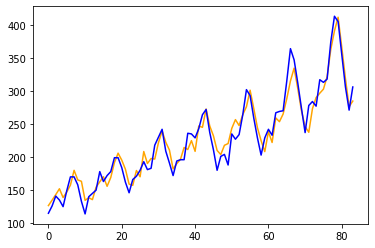

In [160]:
plt.plot(y_train_pred,color="orange")
plt.plot(y_train,color="blue")
plt.show()
#our y_train_predictions are almost close to y_train_true

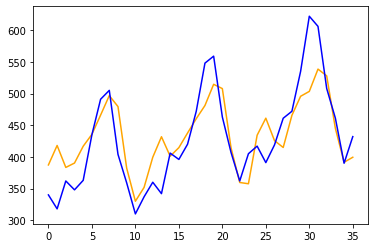

In [161]:
plt.plot(y_pred,color="orange")
plt.plot(y_test,color="blue")
plt.show()
#it is not doing as well as for training datam but still, if y_test is going up
#y_pred is also going up and if down, down. This means that we have atleast generated
#according to a sequence(for exmple during summer months, there would be a rise in no.
#of passengers due to vactions).

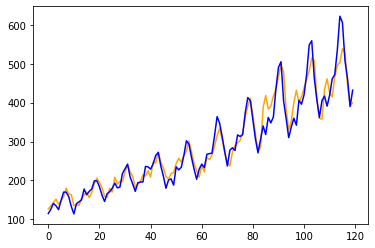

In [167]:
#lets combine both training and testing preedicitons and see the plot:
combined_true=np.concatenate((y_train,y_test))                        #concatenate takes a tuple
combined_pred=np.concatenate((y_train_pred,y_pred))

plt.plot(combined_pred,color="orange")
plt.plot(combined_true,color="blue")
plt.show()

#see that after a while, it is not getting as much accuracy 
#initlially but it is still going along the same direction.
#Thus, RNN is producing a COHERENT(it is not randomly going 
#up or down, it goes up or down according to a definite 
#pattern) sequence given a training sequence.